# Classification and Regression capabilities

A tour of ``XGBClassifierWrapper`` and ``XGBRegressorWrapper`` applied to two toy-datasets. 

The SHAP beeswarm plot provides a clear hierarchy of feature influence on the model's output, while the scatter dependence plots offer more detailed insights into how each feature impacts the output based on its specific values. This is particularly useful for understanding how different feature values push the regression output higher or lower, or, in the case of classification, how they shift the probability toward 1 or 0. The scatter dependence plot is valuable because it reveals whether the feature's influence is monotonic, highly non-linear, or otherwise complex, offering a deeper understanding of the model’s behavior.

## 1. Regression

In [1]:
from apyxl import XGBRegressorWrapper
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)

X.shape, y.shape

((20640, 8), (20640,))

In [2]:
model = XGBRegressorWrapper().fit(X, y)
# defaults to r2 score
model.best_score

0.6763188479029362

Plot methods can handle internally the computation of the SHAP values:

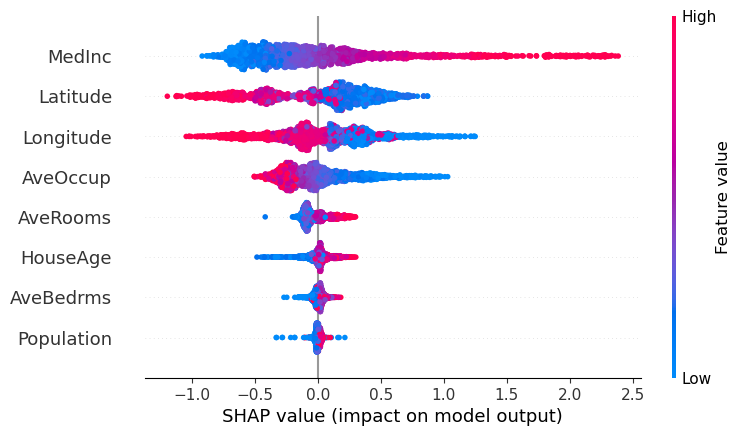

In [3]:
model.beeswarm(X=X.sample(2_500))

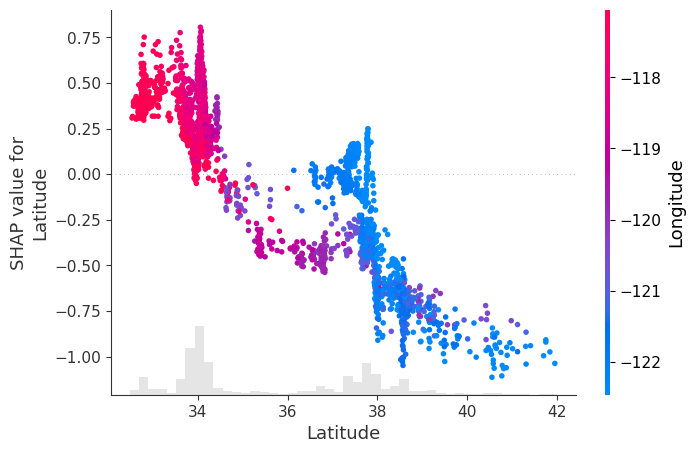

In [4]:
model.scatter(X=X.sample(2_500), feature='Latitude')

## 2. Classification

In [5]:
from apyxl import XGBClassifierWrapper
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(as_frame=True, return_X_y=True)
y -= 1
y.unique()

array([4, 1, 0, 6, 2, 5, 3])

In [6]:
X.shape, y.shape

((581012, 54), (581012,))

To speed up the process, Bayesian hyperparameter optimization can be performed on a subset of the dataset. The model is then fitted on the entire dataset using the optimized hyperparameters.

In [7]:
model = XGBClassifierWrapper().fit(X, y, n=25_000)
# defaults to Matthews correlation coefficient
model.best_score

0.6265663069010666

Computing SHAP values can be resource-intensive, so it's advisable to calculate them once for multiple future uses, especially in multiclass classification scenarios where the cost is even higher compared to binary classification (shap values shape equals (n_samples, n_features, n_classes))

In [8]:
shap_values = model.compute_shap_values(X.sample(1_000))
shap_values.shape

(1000, 54, 7)

The `output` argument selects the shap values associated to the desired class:

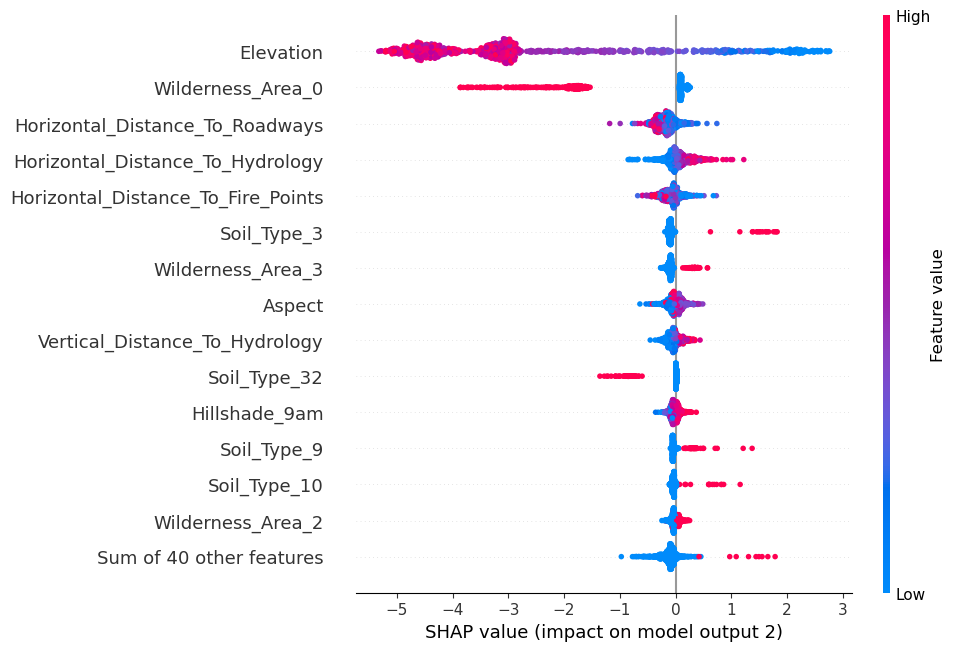

In [9]:
model.beeswarm(shap_values=shap_values, output=2, max_display=15)

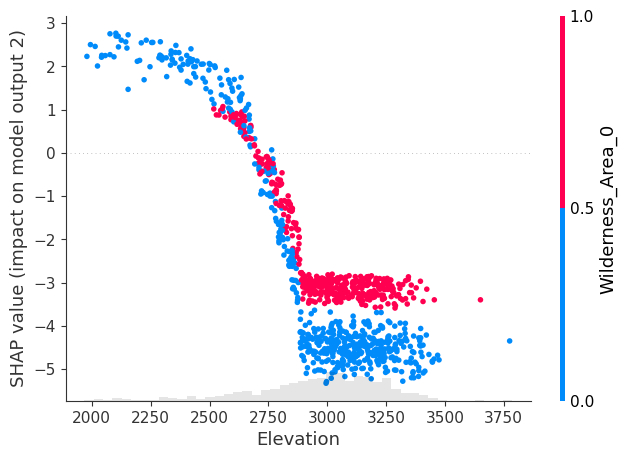

In [10]:
model.scatter(shap_values=shap_values, output=2, feature='Elevation')

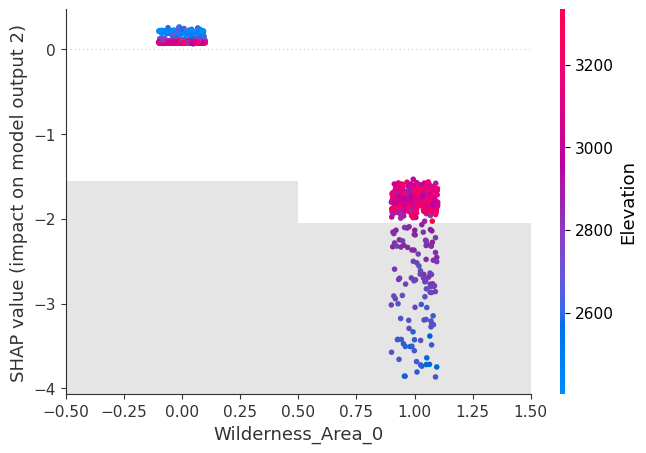

In [11]:
model.scatter(shap_values=shap_values, output=2, feature='Wilderness_Area_0')